In [1]:
# coding: utf-8
import time
import tensorflow as tf
import tensorflow.examples.tutorials.mnist.input_data as input_data
import matplotlib.pyplot as plt

# Read mnist data
mnist = input_data.read_data_sets("MNIST_data/", one_hot=True)
print(mnist.train.images.shape, mnist.train.labels.shape)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz
(55000, 784) (55000, 10)


In [2]:
def add_layer(input_dim, output_dim, inputs, name, activation_function=None):
    with tf.name_scope(name):
        with tf.name_scope('weight'):
            W = tf.Variable(tf.truncated_normal([input_dim, output_dim], stddev=0.1), name="W")
            tf.summary.histogram(name + '/weight', W)
        with tf.name_scope('bias'):
            b = tf.Variable(tf.constant(0.1, shape=[1, output_dim]), name="b")
            tf.summary.histogram(name + '/bias', b)
        with tf.name_scope('Wx_plus_b'):
            Wx_plus_b = tf.add(tf.matmul(inputs, W), b)
        if activation_function is None:
            outputs = Wx_plus_b
        else:
            outputs = activation_function(Wx_plus_b)
        tf.summary.histogram(name + '/output', outputs)
        return outputs

In [3]:
with tf.name_scope('input'):
    # Inputs
    X = tf.placeholder('float', [None, 784], name='input_x')
    # Labels
    y = tf.placeholder('float', [None, 10], name='label_y')
# Hidden Layer
h1 = add_layer(input_dim=784, output_dim=1024, inputs=X, name='hidden_layer_1', activation_function=tf.nn.relu)
# Output Layer
y_hat = add_layer(input_dim=1024, output_dim=10, inputs=h1, name='output_layer', activation_function=tf.nn.softmax)

In [4]:
with tf.name_scope('loss'):
    loss_function = -tf.reduce_sum(y * tf.log(y_hat))
tf.summary.scalar('loss', loss_function)

with tf.name_scope('train'):
    optimizer = tf.train.AdamOptimizer(learning_rate=0.001).minimize(loss_function)
    
with tf.name_scope('accuracy'):
    with tf.name_scope('correction_prediction'):
        correct_prediction_count = tf.equal(tf.argmax(y, 1), tf.argmax(y_hat, 1))
    with tf.name_scope('accuracy'):
        acc = tf.reduce_mean(tf.cast(correct_prediction_count, 'float'))
tf.summary.scalar('accuracy', acc)

<tf.Tensor 'accuracy_1:0' shape=() dtype=string>

In [5]:
epoch = 10
batch_size = 150
batch = int(mnist.train.num_examples / batch_size)

In [7]:
acc_training_list = []
acc_validation_list = []
acc_testing_list = []

saver = tf.train.Saver()

sess = tf.Session()
# merged = tf.summary.merge_all()
# writer = tf.summary.FileWriter("logs/", sess.graph)
sess.run(tf.global_variables_initializer())
iteration = 0

try:
    for i in range(epoch):
        for _ in range(batch):
            iteration += 1
            batch_x, batch_y = mnist.train.next_batch(batch_size)
            sess.run(optimizer, feed_dict={X: batch_x, y: batch_y})
#             if iteration % 50 == 0:
#                 result = sess.run(merged, feed_dict={X: batch_x, y: batch_y})
#                 writer.add_summary(result, iteration)

        acc_training = sess.run(acc, feed_dict={X: mnist.train.images, y: mnist.train.labels})
        acc_validation = sess.run(acc, feed_dict={X: mnist.validation.images, y: mnist.validation.labels})
        acc_testing = sess.run(acc, feed_dict={X: mnist.test.images, y: mnist.test.labels})

        acc_training_list.append(acc_training)
        acc_validation_list.append(acc_validation)
        acc_testing_list.append(acc_testing)

        file_name = 'regular_training_epoch_%d.ckpt' % (i+1)
        save_path = saver.save(sess, "regular_train/" + file_name)
        print("Model saved in path: %s" % save_path)

        print("Epoch: %2d, acc_training: %.4f, acc_validation: %.4f, acc_testing: %.4f" %
              (i+1, acc_training, acc_validation, acc_testing))
except:
    print('An error occurs!')
    now_time = int(time.time())
    file_name = '%d.ckpt' % now_time
    save_path = saver.save(sess, "interrupted_train/" + file_name)
    print("Model saved in path: %s" % save_path)
    

Model saved in path: regular_train/regular_training_epoch_1.ckpt
Epoch:  1, acc_training: 0.9686, acc_validation: 0.9640, acc_testing: 0.9604
Model saved in path: regular_train/regular_training_epoch_2.ckpt
Epoch:  2, acc_training: 0.9804, acc_validation: 0.9708, acc_testing: 0.9685
Model saved in path: regular_train/regular_training_epoch_3.ckpt
Epoch:  3, acc_training: 0.9888, acc_validation: 0.9778, acc_testing: 0.9752
Model saved in path: regular_train/regular_training_epoch_4.ckpt
Epoch:  4, acc_training: 0.9943, acc_validation: 0.9804, acc_testing: 0.9768
Model saved in path: regular_train/regular_training_epoch_5.ckpt
Epoch:  5, acc_training: 0.9952, acc_validation: 0.9778, acc_testing: 0.9772
Model saved in path: regular_train/regular_training_epoch_6.ckpt
Epoch:  6, acc_training: 0.9971, acc_validation: 0.9824, acc_testing: 0.9793
Model saved in path: regular_train/regular_training_epoch_7.ckpt
Epoch:  7, acc_training: 0.9971, acc_validation: 0.9792, acc_testing: 0.9793
Model 

In [21]:
import matplotlib.pyplot as plt
def show_train_history(training, validation, testing):
    max_acc = max(testing)
    index = testing.index(max_acc)
    annotate = 'test_acc = %.4f at epoch %d' % (max_acc, index)
    plt.plot(training)
    plt.plot(validation)
    plt.plot(testing)
    plt.annotate(annotate, xy=(index, max_acc), xytext=(index, max_acc + 0.005), arrowprops=dict(facecolor='black', shrink=0.01))
    plt.title('Train History')
    plt.xlabel('Epoch')
    plt.ylabel('test_acc')
    plt.legend(['Training', 'Validation', 'Testing'], loc='upper left')
    plt.show()

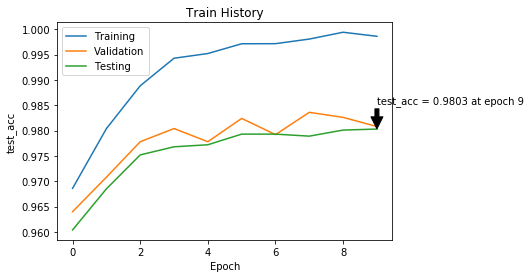

In [22]:
show_train_history(acc_training_list, acc_validation_list, acc_testing_list)

In [20]:
# import numpy as np
# W = tf.Variable(np.arange(784*1024).reshape(784, 1024), name="W")
# b = tf.Variable(np.arange(1*1024).reshape(1, 1024), name="b")
# saver = tf.train.Saver()
# with tf.Session() as sess:
#     saver.restore(sess, "regular_train/regular_training_epoch_7.ckpt")
#     print("weight:", sess.run(optimizer))
#     print("bias  :", sess.run(b))

INFO:tensorflow:Restoring parameters from regular_train/regular_training_epoch_7.ckpt


NotFoundError: Key W not found in checkpoint
	 [[Node: save_5/RestoreV2 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_arg_save_5/Const_0_0, save_5/RestoreV2/tensor_names, save_5/RestoreV2/shape_and_slices)]]

Caused by op 'save_5/RestoreV2', defined at:
  File "//anaconda/envs/py3/lib/python3.6/runpy.py", line 193, in _run_module_as_main
    "__main__", mod_spec)
  File "//anaconda/envs/py3/lib/python3.6/runpy.py", line 85, in _run_code
    exec(code, run_globals)
  File "//anaconda/envs/py3/lib/python3.6/site-packages/ipykernel/__main__.py", line 3, in <module>
    app.launch_new_instance()
  File "//anaconda/envs/py3/lib/python3.6/site-packages/traitlets/config/application.py", line 658, in launch_instance
    app.start()
  File "//anaconda/envs/py3/lib/python3.6/site-packages/ipykernel/kernelapp.py", line 474, in start
    ioloop.IOLoop.instance().start()
  File "//anaconda/envs/py3/lib/python3.6/site-packages/zmq/eventloop/ioloop.py", line 177, in start
    super(ZMQIOLoop, self).start()
  File "//anaconda/envs/py3/lib/python3.6/site-packages/tornado/ioloop.py", line 887, in start
    handler_func(fd_obj, events)
  File "//anaconda/envs/py3/lib/python3.6/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "//anaconda/envs/py3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 440, in _handle_events
    self._handle_recv()
  File "//anaconda/envs/py3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 472, in _handle_recv
    self._run_callback(callback, msg)
  File "//anaconda/envs/py3/lib/python3.6/site-packages/zmq/eventloop/zmqstream.py", line 414, in _run_callback
    callback(*args, **kwargs)
  File "//anaconda/envs/py3/lib/python3.6/site-packages/tornado/stack_context.py", line 275, in null_wrapper
    return fn(*args, **kwargs)
  File "//anaconda/envs/py3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 276, in dispatcher
    return self.dispatch_shell(stream, msg)
  File "//anaconda/envs/py3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 228, in dispatch_shell
    handler(stream, idents, msg)
  File "//anaconda/envs/py3/lib/python3.6/site-packages/ipykernel/kernelbase.py", line 390, in execute_request
    user_expressions, allow_stdin)
  File "//anaconda/envs/py3/lib/python3.6/site-packages/ipykernel/ipkernel.py", line 196, in do_execute
    res = shell.run_cell(code, store_history=store_history, silent=silent)
  File "//anaconda/envs/py3/lib/python3.6/site-packages/ipykernel/zmqshell.py", line 501, in run_cell
    return super(ZMQInteractiveShell, self).run_cell(*args, **kwargs)
  File "//anaconda/envs/py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2717, in run_cell
    interactivity=interactivity, compiler=compiler, result=result)
  File "//anaconda/envs/py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2821, in run_ast_nodes
    if self.run_code(code, result):
  File "//anaconda/envs/py3/lib/python3.6/site-packages/IPython/core/interactiveshell.py", line 2881, in run_code
    exec(code_obj, self.user_global_ns, self.user_ns)
  File "<ipython-input-20-06ac210dd1eb>", line 4, in <module>
    saver = tf.train.Saver()
  File "//anaconda/envs/py3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1140, in __init__
    self.build()
  File "//anaconda/envs/py3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 1172, in build
    filename=self._filename)
  File "//anaconda/envs/py3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 688, in build
    restore_sequentially, reshape)
  File "//anaconda/envs/py3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 407, in _AddRestoreOps
    tensors = self.restore_op(filename_tensor, saveable, preferred_shard)
  File "//anaconda/envs/py3/lib/python3.6/site-packages/tensorflow/python/training/saver.py", line 247, in restore_op
    [spec.tensor.dtype])[0])
  File "//anaconda/envs/py3/lib/python3.6/site-packages/tensorflow/python/ops/gen_io_ops.py", line 663, in restore_v2
    dtypes=dtypes, name=name)
  File "//anaconda/envs/py3/lib/python3.6/site-packages/tensorflow/python/framework/op_def_library.py", line 767, in apply_op
    op_def=op_def)
  File "//anaconda/envs/py3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 2630, in create_op
    original_op=self._default_original_op, op_def=op_def)
  File "//anaconda/envs/py3/lib/python3.6/site-packages/tensorflow/python/framework/ops.py", line 1204, in __init__
    self._traceback = self._graph._extract_stack()  # pylint: disable=protected-access

NotFoundError (see above for traceback): Key W not found in checkpoint
	 [[Node: save_5/RestoreV2 = RestoreV2[dtypes=[DT_FLOAT], _device="/job:localhost/replica:0/task:0/cpu:0"](_arg_save_5/Const_0_0, save_5/RestoreV2/tensor_names, save_5/RestoreV2/shape_and_slices)]]
